## Clustering 
## 1.Hierarchical Clustering(Dendrogram)
## 2.K-means

FIRA 빅데이터 플랫폼 과정 <데이터마이닝> - 2017.08.14.월 14:00-18:00

### 1. Data : 21.6(교재)
- 1-1. `BathSoap.xlsx`
- 1-2. Data Load : `pd.read_xlsx`
- 1-3. Join Table : `pd.merge`
- 1-4. Delete Rows & Columns

### <font color = red>2.Hierarchical Clustering 
- <font color = red>2-1.`sklearn.cluster.AgglomerativeClustering`
- <font color = red>2-2.Clustering with Dendrogram : `scipy.cluster.hierarchy`

### <font color = red>3. K-means
- <font color = red>3-1.`sklearn.cluster.KMeans`

### 4. Analysis 
- 4-1. Choose K : Using Silhouette Plot
- 4-2. .groupby()

### 5. 실습 : 비누 판매 마케팅 전략 수립을 위한 데이터 분석
- 5-1. More Preprocessing
- 5-2. 비누 구매 고객 세분화
- 5-3. 타겟 클러스터 선정 및 마케팅 기획

### 1. Data
---
- 1-1. `BathSoap.xlsx`
- 1-2. Data Load : `pd.read_xlsx`
- 1-3. Join Table : `pd.merge`
- 1-4. Delete Rows & Columns

#### 1-1.  `BathSoap.xlsx`
---
- sheet3 : DM_Sheet,  멤버 정보 및 비누 구입 정보

- sheet4 : Durables, 멤버들의 비누 이외 <font color = red>타물품 소유 정보
---
비누를 구매한 고객들의 데이터를 토대로 군집화를 이용하여 효과적인 마케팅 전략을 수립하려고 한다. 총 600개의 표본을 각종 변수를 고려하여 치밀하게 표집하였다. 주어진 데이터는 각종 인구통계자료, 내구재 소유 자료, 제품의 카테고리와 각 브랜드에 대한 구매 데이터이다.

*Q. 군집화는 마케팅 전략을 세우는데 어떤 역할을 할 수 있는가?

    비슷한 군집에 속한사람들을 공략할 수 있음.

#### 1-2. Data Load : `pd.read_excel`
---
`BathSoap.xlsx` 파일에서 데이터가 있는 sheet를 DataFrame으로 변환
* pd.read_excel document 참고
* sheet 위치, header로 쓸 row를 잘 지정할 것
* row의 시작은 0

In [1]:
import pandas as pd

In [2]:
# df(BathSoap.xlsx의 3번 시트인 DM_sheet)
df = pd.read_excel('BathSoap.xlsx', 2, header=2)
df

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564
1,1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,...,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000
2,1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,...,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247
3,1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000
4,1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,...,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000
5,1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,...,0.099037,0.000000,0.006878,0.071527,0.000000,0.000000,0.000000,0.000000,0.066025,0.269601
6,1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,...,0.000000,0.022613,0.007538,0.000000,0.000000,0.000000,0.000000,0.000000,0.045226,0.103015
7,1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008065,0.000000,0.895161,0.032258
8,1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,...,0.280294,0.000000,0.000000,0.015100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1017460.0,1.0,3.0,5.0,1.0,4.0,7.0,3.0,4.0,1.0,...,0.462777,0.150905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120724,0.026828


In [3]:
# durable_df
durable_df = pd.read_excel('BathSoap.xlsx', 3, header=4)[:600]
#data에 문제가 있음 [:600]까지해야 겹쳐지지 않는다.
durable_df

,MEM,Unnamed: 1,Radio/Transistor with FM,Radio/Transistor without FM,Stereo/Mono Tape Recorder,Two-in-one,Hi-Fi System/Music System without Compact disk,Hi-Fi System/Music System with Comapct disk,Walkman with FM,Walkman without FM,...,Personal/Home Computers,Computer Printers,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher
0,1010010,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1010020,19,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1014020,23,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1014030,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1014190,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1017020,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1017110,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1017160,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1017360,17,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1017460,6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1-3. Join Table : `pd.merge`
---
DM_Sheet와 Durables의 DataFrame을 통합
* 'Member id', 'MEM'을 기준으로 통합, Inner Join

In [8]:
# merged_df & set_index
merged_df = df.merge(durable_df, how="inner", left_on='Member id', right_on='MEM').set_index('Member id')
#left_on은 그냥 df에서 가져오는거고, right_on은 durable_df에서 가져온거다.
#set_index('칼럼명') : 행으로 삼고싶은 column을 네가 원하는걸 알려줘
merged_df
#merge를 할 기준이 되는 df는 durable_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Personal/Home Computers,Computer Printers,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1-4. Delete Rows & Columns : df.drop() 사용
---
* Delete Rows : 결측치가 있는 행은 지울 것
* Delete Columns : 겹치거나 문제가 있는 열을 지울 것

In [5]:
# Delete Rows : no_nan_df
#merged_df.isnull() 전체 dataframe을 보여주는데, null인 부분은 True로 나타난다.
#merged_df.isnull().sum() -> 열별로 찾아줌
#merged_df.isnull().sum(axis=1) -> 행별로 찾아줌
#merged_df.isnull().sum(axis=1) == 0 이렇게하면 NAN인 애들은 없어짐
no_nan_df = merged_df[merged_df.isnull().sum(axis=1) == 0]
no_nan_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Personal/Home Computers,Computer Printers,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
list(no_nan_df)
#이렇게 하면 column들을 볼 수 있따.
#이걸 보면 member_id가 있는데 MEM이 또 있어서 중복되서 문제됨
#또한 Unnamed_1 은 Afflunce Index 어떤 내구재를 갖고있느냐에 따라서 가중치를 다르게 주는 역할을 하는데, 중복됨.

['SEC',
 'FEH',
 'MT',
 'SEX',
 'AGE',
 'EDU',
 'HS',
 'CHILD',
 'CS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'MEM',
 'Unnamed: 1',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD

### <font color=red> Delete columns : df.drop() / ★여기서는 axis=1은 column을 지우는 것(sum()이나 보통의 다른 함수랑 다른점임★
- 1) 지울 column명을 따로 변수지정
- 2) 지울 column명들이 있는 변수를 활용해서 .drop()함수에 적용해서 삭제

In [7]:
# Delete columns : df.drop() 사용
# df.drop(['row이름1', 'row이름2']) / df.drop(['col이름1', 'col이름2'], axis=1)
# ★여기서 axis=1이 의미하는건 column에서 찾아본다는 뜻이다.
# NAN인경우 말고도 지워야 하는 경우가 발생할 때 사용
# X_df = no_nan_df.drop()
want_to_delete_cols = ['MEM', 'Unnamed: 1']
X_df = no_nan_df.drop(want_to_delete_cols, axis=1)
print(X_df)
list(X_df.columns) #이걸하면 위에서처럼 column들의 list를 보면서 사라졌는지 확인할 수 있다.
#X_df = no_nan_df.drop(['MEM', 'Unnamed: 1'], axis=1)

           SEC  FEH    MT  SEX  AGE  EDU   HS  CHILD   CS  Affluence Index  \
Member id                                                                    
1010010.0  4.0  3.0  10.0  1.0  4.0  4.0  2.0    4.0  1.0              2.0   
1010020.0  3.0  2.0  10.0  2.0  2.0  4.0  4.0    2.0  1.0             19.0   
1014020.0  2.0  3.0  10.0  2.0  4.0  5.0  6.0    4.0  1.0             23.0   
1014030.0  4.0  0.0   0.0  0.0  4.0  0.0  0.0    5.0  0.0              0.0   
1014190.0  4.0  1.0  10.0  2.0  3.0  4.0  4.0    3.0  1.0             10.0   
1017020.0  4.0  3.0  10.0  2.0  3.0  4.0  5.0    2.0  1.0             13.0   
1017110.0  4.0  2.0  10.0  2.0  4.0  1.0  3.0    2.0  1.0             11.0   
1017160.0  4.0  3.0  10.0  2.0  2.0  4.0  5.0    3.0  0.0              0.0   
1017360.0  4.0  3.0  10.0  2.0  4.0  4.0  6.0    4.0  1.0             17.0   
1017460.0  1.0  3.0   5.0  1.0  4.0  7.0  3.0    4.0  1.0              6.0   
1017490.0  4.0  3.0  10.0  2.0  4.0  4.0  6.0    4.0  1.0       

['SEC',
 'FEH',
 'MT',
 'SEX',
 'AGE',
 'EDU',
 'HS',
 'CHILD',
 'CS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD/LD/DVD',
 'TV - Black 

### 2. Hierarchical Clustering : 계층적 군집화
### agglomerativeClustering : bottom up방식임
#### : 가까운것들끼리 cluster로 묶어주면서 최종적으로 1개의 cluster될때까지 함.
---


#### 2-1. `sklearn.cluster.AgglomerativeClustering`
---
- <font color = red>Parameter
    - `n_cluster` - 클러스터의 개수
- Return : 모든 데이터의 Label

In [10]:
# import packages
from sklearn.cluster import AgglomerativeClustering

In [11]:
# parameter setting(n_clusters는 단순한 변수명임)
n_cluster = 5

In [12]:
# sklearn_hc_model(sklearn_hc_model는 단순한 변수명임) / n_clusters=변수명 or 숫자
sklearn_hc_model = AgglomerativeClustering(n_clusters=n_cluster)
# 이 데이터 쓸거라고 선언해줌

In [13]:
# fit to model
sklearn_hc_model.fit(X_df)
#fit('데이터') : 이 데이터에 대해서 fit해라

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=5,
            pooling_func=<function mean at 0x000002820EFBF620>)

In [14]:
# get predicted labels
predicted_labels_sklearn = sklearn_hc_model.labels_
#label은 의미없고 돌릴때마다 다를수 있다 0이라고 되어있으면 0끼리 같은 군집이라는 것에 의미가 있음
predicted_labels_sklearn
#sklearn_hc_model.fit_predict(X_df)
#이건 fit하고 label까지 한번에 알려주는 것

array([2, 3, 1, 4, 2, 1, 2, 2, 0, 2, 1, 3, 1, 3, 2, 1, 1, 3, 3, 4, 2, 2, 0,
       4, 4, 1, 3, 3, 3, 2, 3, 2, 4, 1, 1, 3, 2, 2, 3, 4, 2, 3, 1, 4, 0, 2,
       4, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 3, 3, 2, 1, 0, 2,
       3, 2, 3, 3, 2, 3, 2, 4, 2, 1, 2, 2, 0, 3, 2, 4, 1, 3, 0, 4, 1, 3, 0,
       2, 2, 2, 3, 1, 3, 2, 3, 3, 1, 0, 1, 3, 1, 1, 3, 3, 2, 1, 3, 3, 1, 1,
       2, 3, 2, 1, 2, 3, 1, 3, 0, 1, 0, 0, 3, 2, 1, 1, 1, 2, 2, 2, 2, 3, 2,
       3, 1, 1, 3, 3, 3, 1, 2, 2, 2, 2, 2, 4, 4, 2, 3, 3, 3, 2, 4, 2, 0, 1,
       1, 0, 1, 0, 3, 0, 2, 1, 3, 3, 2, 2, 2, 0, 3, 0, 3, 0, 3, 2, 1, 3, 2,
       1, 3, 1, 1, 0, 3, 3, 1, 4, 3, 1, 2, 3, 2, 1, 3, 3, 1, 0, 2, 2, 2, 2,
       1, 3, 1, 3, 2, 3, 1, 0, 4, 3, 2, 3, 3, 3, 0, 1, 2, 2, 2, 1, 1, 2, 4,
       3, 0, 1, 1, 2, 1, 1, 3, 1, 4, 3, 2, 2, 2, 3, 2, 2, 4, 2, 2, 4, 2, 4,
       1, 3, 2, 3, 1, 1, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 2, 0, 1, 2, 2, 3, 3,
       1, 3, 2, 4, 0, 1, 3, 0, 1, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 1,
       3, 4,

In [15]:
# add result column to copied df
# X_df는 다른 방식에 또 data로 활용할 수 있으니 X_df는 그대로 둘 것. result_df로 결과값을 따로 결과값을 copy해둘것
result_df = X_df.copy()
result_df['sklearn_hc_labels'] = predicted_labels_sklearn
result_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Computer Printers,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher,sklearn_hc_labels
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#### 2-2. Clustering with Dendrogram : `scipy.cluster.hierarchy`
---
- Linkage Matrix
- Dendromgram & Set k
- get predicted_labels 

##### Linkage Matrix : `scipy.cluster.hierarchy.linkage`

In [17]:
# import packages
from scipy.cluster.hierarchy import linkage

In [18]:
# Z = linkage(X, method) / method는 연결하는 방법 ward, complete 등등... / 여기서는 'centroid'
# Centroid: 무게중심간의 거리
Z = linkage(X_df, 'centroid')

In [65]:
# What is Z, linkage?
Z[:10]
# 239 492가 제일 가까웠고
# array([[ 239.        ,  492.        ,    2.44948974,    2.        ], 처음에 239와 492를 합친다.(raw data는 0~599까지 있고 239와 492합쳐진건 600에 가게된다.)
#       [ 552.        ,  600.        ,   18.31741733,    3.        ],  552랑 위에서 새로 만들어진 600이랑 clustering 하니깐 여기선 3.이 나타남
Z[598] #0 부터한거니깐 600번째(마지막에 어떻게 합쳐졌는지 알려줌)

array([  1190.       ,   1197.       ,  37519.0134491,    600.       ])

### Dendrogram 그리기 / k 설정하기
##### Dendrogram & Set k : `scipy.cluster.hierarchy.dendrogram`

In [19]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [20]:
# p갯수만큼 cluster가 남고 max_d설정하면 max_d에 가로줄 생긴다.
def plot_dendrogram(title, xlabel, ylabel, Z, max_d=None, p=None):
    # Settings for figure
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Index of Data')
    plt.ylabel('Distance')

    # Dendrogram
    if p:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
            truncate_mode = 'lastp',
            p=p,
            show_contracted = True
        )
    else:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
        )
    
    if max_d:
        plt.axhline(y=max_d, c='k')
    plt.show()

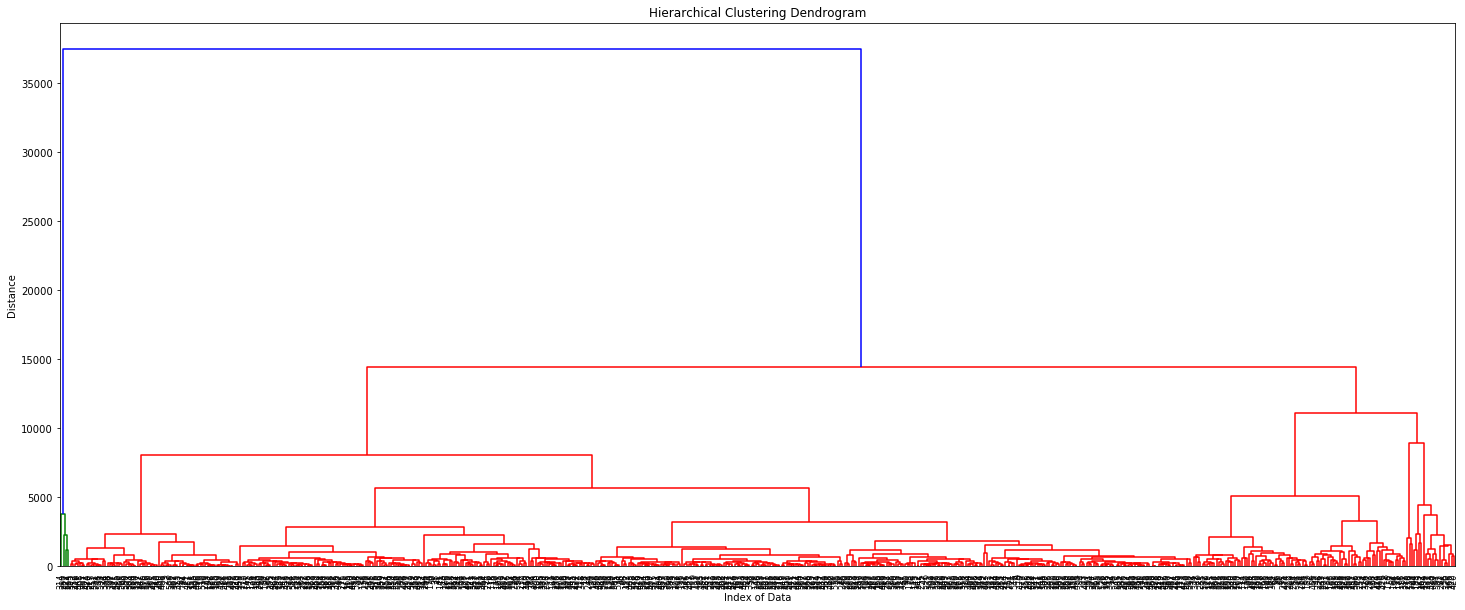

In [21]:
# plot dendrogram
plot_dendrogram('Hierarhcical Clustering Dendrogram', 'Index of Data', 'Distance', Z)
#모든 element에 대한 dendrogram이 나온다.

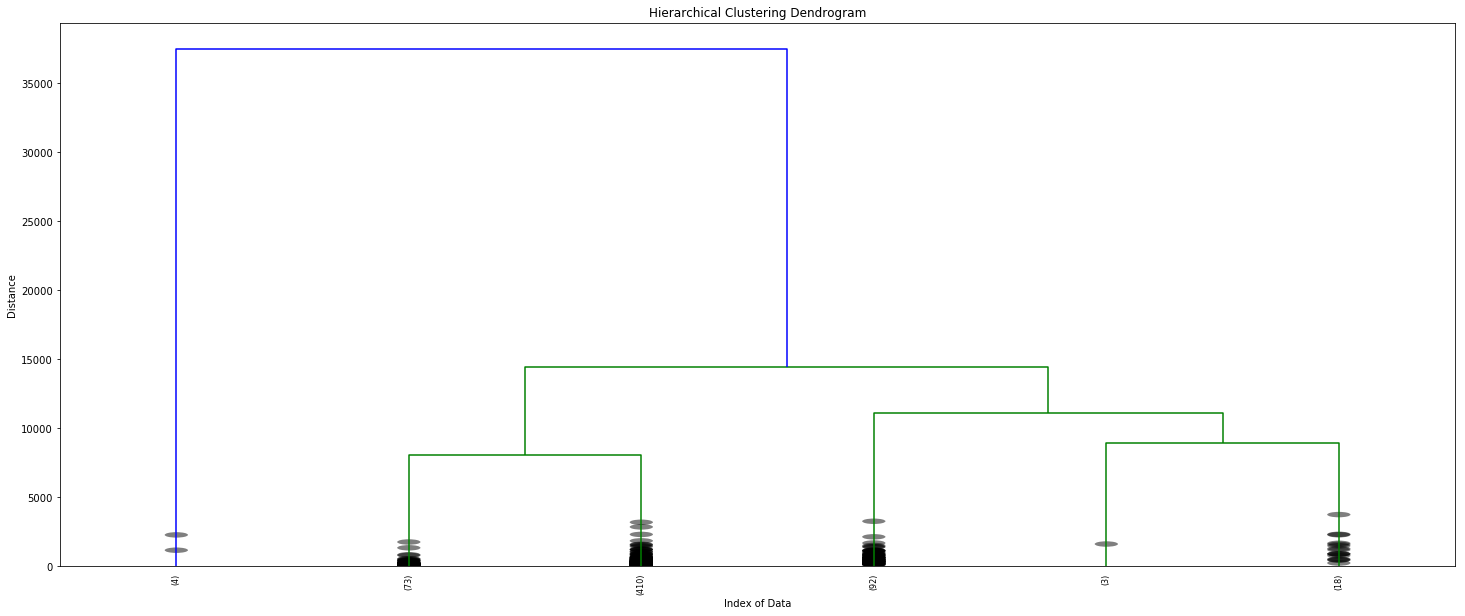

In [22]:
# Dendrogram에 표현할 가지의 개수 정하기 - set p
plot_dendrogram('Hierarhcical Clustering Dendrogram', 'Index of Data', 'Distance', Z, p=6)

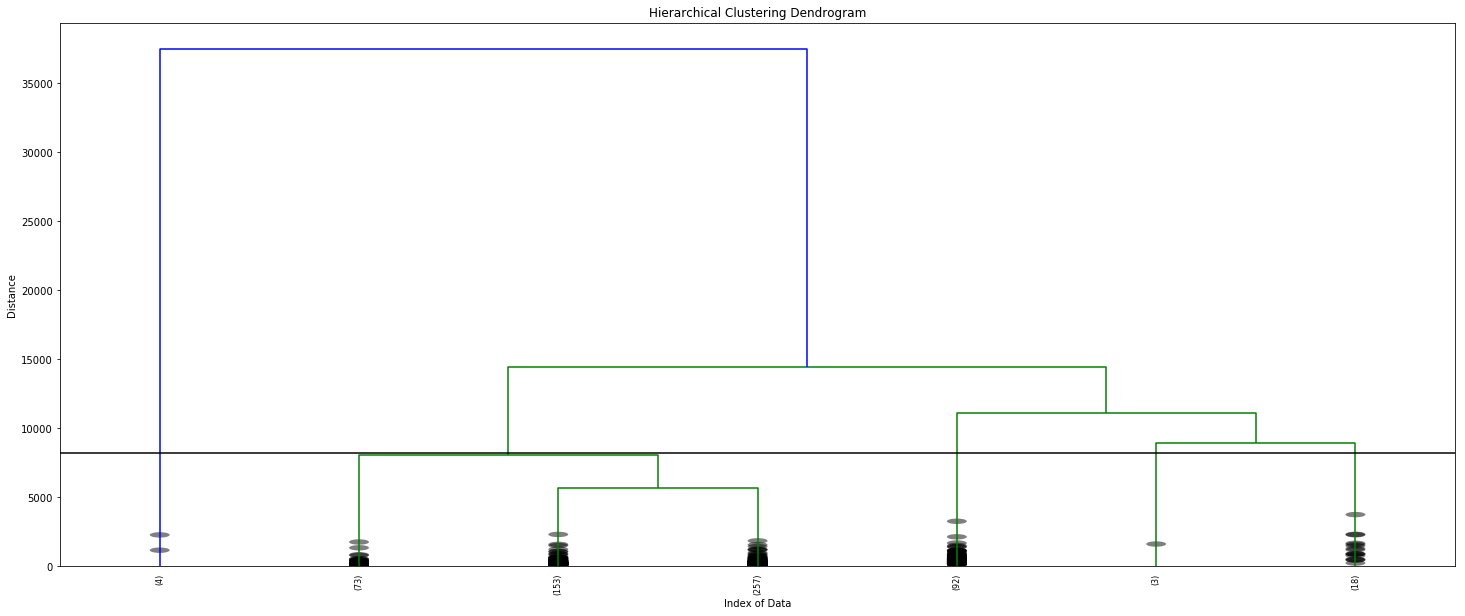

In [23]:
# k를 결정하기 위해, k보다 큰 개수의 p를 가진 dendrogram을 그리고, max_distance를 결정한다.
plot_dendrogram('Hierarhcical Clustering Dendrogram', 'Index of Data', 'Distance', Z, p=7, max_d = 8200)


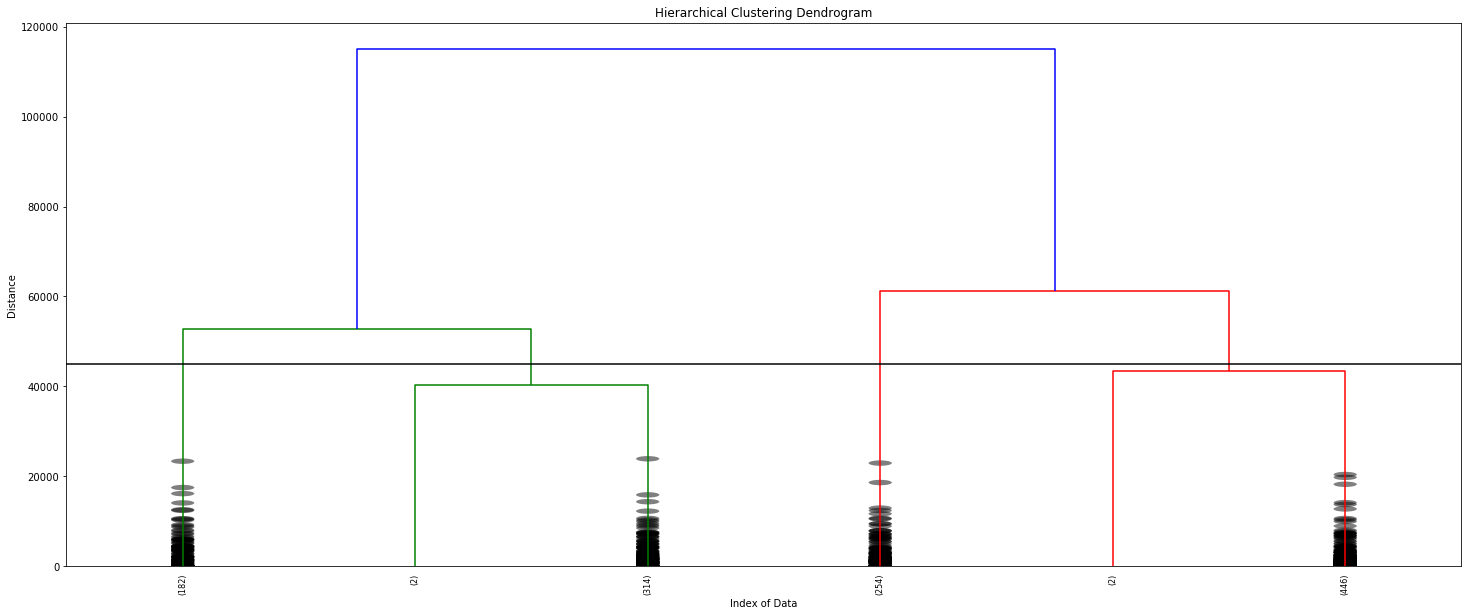

In [513]:
# max_distance에 해당하는 선을 Dendrogram에 그려서 원하는 k를 표현하기 위한 max_distance를 확정한다.
plot_dendrogram('Hierarhcical Clustering Dendrogram', 'Index of Data', 'Distance', Z, p=6, max_d=max_d)

##### predicted_labels : `scipy.cluster.hierarchy.fcluster`

In [25]:
# import packages
from scipy.cluster.hierarchy import fcluster

In [26]:
# predicted_labels
predicted_labels_scipy = fcluster(Z, 8200, criterion='distance')
#8200은 depth임 : 위에서 dendrogram을 통해서 8200을 그으면 5가 된다는 것을 알았기 때문에 할 수 있음.
predicted_labels_scipy
#여기는 0이 아니라 1부터 시작한다.

array([2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 5, 2,
       2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 5, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 5, 2, 2, 2, 3,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 3, 3, 4, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 3,
       3, 5, 3, 3, 2, 5, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2,
       3, 2, 3, 3, 5, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 5, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 4, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2,

In [73]:
# save to result_df
result_df['scipy_hc_labels'] = predicted_labels_scipy
result_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher,sklearn_hc_labels,scipy_hc_labels
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3


### 3. K-Means(앞에서 한 HC랑 코드가 매우 유사하다)
---
##### 3-1. `sklearn.cluster.KMeans`
---
- Parameter
    - `n_cluster` - 클러스터의 개수
- Return : 모든 데이터의 Label

In [28]:
from sklearn.cluster import KMeans

In [29]:
# set parameters
n_cluster = 5

In [30]:
# kmeans_model
kmeans_model = KMeans(n_clusters=n_cluster)

In [31]:
kmeans_model.fit(X_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
# predicted_labels : 어느군집에 속할지 label붙여주는거
predicted_labels_kmeans = kmeans_model.labels_
predicted_labels_kmeans
#kmeans_model.fit_predict(preprocessed_df)

array([3, 1, 2, 0, 3, 1, 3, 3, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 3, 2,
       0, 0, 1, 3, 3, 3, 0, 1, 3, 0, 2, 1, 3, 0, 3, 1, 0, 3, 1, 2, 0, 2, 3,
       0, 3, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 3, 1, 1, 1, 3, 3, 3, 2, 2, 3,
       1, 3, 3, 3, 0, 1, 0, 0, 3, 1, 0, 0, 2, 1, 0, 0, 1, 3, 2, 0, 1, 3, 2,
       3, 3, 3, 3, 1, 3, 0, 3, 1, 1, 2, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 1, 3, 1, 3, 1, 1, 1, 2, 2, 2, 4, 3, 3, 1, 1, 1, 3, 3, 0, 0, 3, 0,
       3, 2, 1, 1, 3, 3, 1, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 2, 1,
       2, 2, 1, 2, 3, 2, 0, 1, 1, 1, 3, 0, 3, 2, 3, 2, 3, 2, 3, 3, 1, 3, 0,
       1, 1, 2, 1, 2, 3, 1, 1, 0, 3, 1, 3, 3, 0, 1, 3, 3, 2, 2, 3, 3, 3, 0,
       2, 3, 1, 3, 0, 3, 1, 2, 0, 3, 0, 3, 3, 3, 4, 1, 0, 3, 0, 1, 1, 0, 0,
       3, 2, 1, 2, 3, 1, 1, 3, 2, 0, 3, 3, 3, 0, 1, 0, 0, 0, 3, 0, 0, 3, 0,
       1, 1, 3, 1, 1, 2, 3, 3, 0, 3, 1, 1, 3, 1, 3, 3, 3, 4, 2, 0, 3, 1, 3,
       1, 3, 0, 0, 4, 1, 3, 2, 1, 3, 3, 3, 1, 3, 3, 0, 3, 3, 0, 1, 1, 3, 1,
       3, 0,

In [33]:
# cluster_centers_
kmeans_model.cluster_centers_
#array가 5개가 나오는데 각각은 113차원으로 나온다!
#변수가 113개라는 의미

array([[  2.18857143e+00,   1.37714286e+00,   5.77714286e+00,
          1.29142857e+00,   3.05142857e+00,   3.39428571e+00,
          2.46857143e+00,   3.60000000e+00,   6.80000000e-01,
          1.41542857e+01,   3.02285714e+00,   1.07714286e+01,
          4.45408571e+03,   1.73428571e+01,   5.61693714e+02,
          1.93712143e+00,   3.11461722e+02,   1.28097851e+01,
          8.99771962e-01,   5.94058970e-02,   4.08221406e-02,
          1.83841307e-01,   1.02007595e-01,   4.18350648e-02,
          3.33568410e-02,   2.90888692e-02,   2.56899571e-02,
          3.09714851e-02,   1.48948583e-02,   5.38314023e-01,
          3.62178182e-01,   4.60252080e-01,   1.11208353e-01,
          6.63613853e-02,   4.49584418e-01,   7.38361993e-02,
          1.05615574e-01,   1.01466880e-01,   2.30391801e-02,
          3.12185553e-02,   3.13911681e-02,   1.09861708e-02,
          3.64211392e-02,   1.08973879e-01,   2.74668374e-02,
          0.00000000e+00,   2.51428571e-01,   1.48571429e-01,
        

In [34]:
# add result to result_df
result_df['kmeans_labels'] = predicted_labels_kmeans
result_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher,sklearn_hc_labels,kmeans_labels
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2


### 4. Analysis
---
#### 4-1. Choose k : Using Silhouette Plot
#### : silhouette_avg가 1에 가까울 수록 잘 클러스트 된 것이다.
---

In [36]:
# import packages
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [37]:
# silhouette_avg : kmeans_labels는 같은 클러스트인지 구별해주는데 써주는 식별자 역할을 한다.
silhoutette_avg = silhouette_score(X_df, result_df['kmeans_labels'])
silhoutette_avg

0.51046010568225753

In [39]:
# silhouette_value of each data
sample_silhouette_values = silhouette_samples(X_df, result_df['kmeans_labels'])
sample_silhouette_values

array([ 0.31034109,  0.20200959,  0.37807844,  0.63174529,  0.38479686,
        0.69467074,  0.70748458,  0.61276529,  0.65930914,  0.03986702,
        0.66412742,  0.15114063,  0.31402701,  0.57448643,  0.61659635,
        0.64617035,  0.60661558,  0.42104077,  0.34916376,  0.59906699,
        0.41126746,  0.05443781,  0.53058601,  0.63466289,  0.66388102,
        0.67790048,  0.72846996,  0.47727099,  0.71471137,  0.49413998,
        0.49049717,  0.03290485,  0.61513655,  0.09359808,  0.65527245,
        0.46333612,  0.64648952,  0.7085491 ,  0.4696289 ,  0.67089849,
        0.70705163,  0.54971592,  0.43317569,  0.60857962,  0.27087651,
        0.65995874,  0.66935895,  0.69347238,  0.62632365,  0.4546891 ,
        0.1787868 ,  0.63043042,  0.29689175,  0.66266674,  0.63883597,
        0.69038456,  0.62895416,  0.62491878,  0.56910644,  0.58264366,
        0.45498035,  0.47876263,  0.44397863,  0.61301701,  0.64152339,
        0.71141362,  0.41679678,  0.54481037,  0.72590759,  0.39

In [527]:
def plot_silhouette(X_df, labels):
    cluster_labels = sorted(np.unique(labels))
    n_clusters = len(cluster_labels)
    
    plt.figure()

    # axis setting
    ax = plt.gca()
    ax.set_xlim([-0.5, 1])
    ax.set_ylim([0, X_df.shape[0] + (n_clusters + 1) * 10])

    y_lower = 10
    
    silhouette_avg = silhouette_score(X_df, labels)
    print("k : {}".format(n_clusters))
    print("silhouette_avg : {}".format(silhouette_avg))
    data_silhouette_values = silhouette_samples(X_df, labels)

    for i in cluster_labels:
        # 특정 클러스터의 silhouette 값만 추출
        ith_cluster_silhouette_values = data_silhouette_values[labels == i]
        
        # 내림차순으로 정렬
        ith_cluster_silhouette_values.sort()

        # 해당 클러스터의 크기
        size_cluster_i = len(ith_cluster_silhouette_values)
       
        # 클러스터의 silhouette을 표시할 y축 최고값 결정
        y_upper = y_lower + size_cluster_i

        # 색
        color = cm.spectral(float(i) / n_clusters)
        
        # plot silhouette
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # y축에 클러스터 이름 표시
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 다음 클러스터의 silhouette을 표시할 최저점 조정
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for k={}".format(n_clusters))
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # silhouette 평균 값을 나타내는 선
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # y축 값 제거
    ax.set_yticks([])

    plt.show() 

k : 2
silhouette_avg : 0.6440512333889737


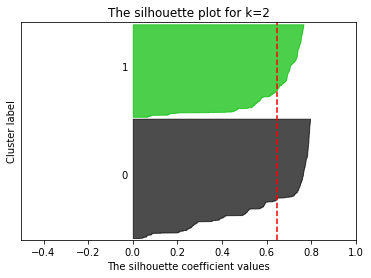

k : 3
silhouette_avg : 0.5996487526087213


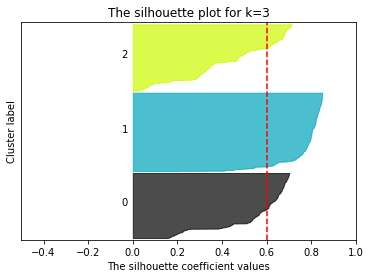

k : 4
silhouette_avg : 0.6334000582083456


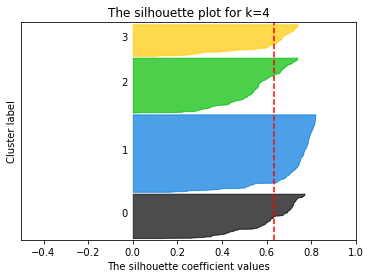

k : 5
silhouette_avg : 0.5959177149004259


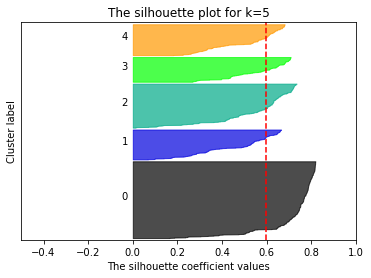

In [528]:
# plot silhouette for choosing k
k_candidates = [2, 3, 4, 5]
for i in k_candidates:
    ith_model = KMeans(n_clusters=i)
    labels = ith_model.fit_predict(preprocessed_df)
    plot_silhouette(preprocessed_df, labels)

#### 4-2. groupby()

In [84]:
#군집 별로 어떤 평균값을 갖는지 보려는 것임
result_df.groupby('scipy_hc_labels').mean()
#예를 들어 SEX가 2.00000이면 여자들만 묶인 군집이라는 뜻임

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher,sklearn_hc_labels,kmeans_labels
scipy_hc_labels,,,,,,,,,,,,,,,,,,,,,
1,2.000000,2.000000,9.000000,2.000000,4.000000,3.000000,9.000000,2.250000,1.000000,16.250000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.000000
2,2.412008,1.917184,7.776398,1.689441,3.175983,4.072464,3.732919,3.316770,0.904762,16.732919,...,0.010352,0.016563,0.0,0.0,0.0,0.0,0.0,0.0,2.548654,1.571429
3,2.913043,2.641304,9.652174,1.923913,3.315217,3.847826,5.945652,2.847826,1.032609,17.891304,...,0.054348,0.010870,0.0,0.0,0.0,0.0,0.0,0.0,0.793478,1.695652
4,2.333333,2.333333,10.333333,2.000000,3.333333,5.333333,6.000000,2.333333,1.000000,21.666667,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.000000
5,2.888889,2.500000,10.888889,2.000000,3.500000,4.277778,6.166667,3.333333,1.111111,19.666667,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.000000


*Q. 지금까지 진행해온 분석의 문제점은?*
- 범주형 변수를 수치형 변수처럼 분석함
- 수치형 데이터가 동일한 범위를 갖지 않음
- 구매와 관련된 변수만 선택되지 않았음

In [85]:
# Hint 1 : 다 범주형 변수 / 숫자가 의미없음. 식습관이 2.5라는것 의미가 없음
result_df.groupby('sklearn_hc_labels').mean().iloc[:, :10]

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index
sklearn_hc_labels,,,,,,,,,,
0,2.795455,2.522727,10.159091,2.000000,3.500000,4.022727,6.522727,3.068182,1.068182,18.363636
1,2.873786,2.582524,9.495146,1.912621,3.320388,3.844660,5.543689,2.873786,1.019417,17.854369
2,2.290043,2.051948,8.311688,1.848485,3.194805,4.714286,3.744589,3.168831,1.008658,19.307359
3,2.664430,2.201342,8.986577,1.892617,3.241611,4.241611,4.778523,3.107383,1.006711,17.328859
4,2.123288,0.684932,3.054795,0.671233,2.890411,1.808219,1.095890,4.301370,0.328767,7.164384


In [86]:
# Hint 2 : 여기는 수치형 변수인데, 군집화는 거리에 민감한데, 모든 변수들에대해서 차이가 비슷해야함(정규화해줘야함)
# (예) Total Volume의 차이와 No. of Trans의 차이의 범위차이가 너무 크다.
X_df.iloc[:10, 11:46]

,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,Radio/Transistor with FM
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,17.0,8025.0,24.0,818.0,1.411765,334.375000,10.193146,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564,0.0
1010020.0,25.0,13975.0,40.0,1681.5,1.600000,349.375000,12.032200,0.887299,0.096601,0.016100,...,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000,0.0
1014020.0,37.0,23100.0,63.0,1950.0,1.702703,366.666667,8.441558,0.941558,0.019481,0.038961,...,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247,0.0
1014030.0,4.0,1500.0,4.0,114.0,1.000000,375.000000,7.600000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000,0.0
1014190.0,6.0,8300.0,13.0,591.0,2.166667,638.461538,7.120482,0.614458,0.144578,0.240964,...,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000,0.0
1017020.0,26.0,18175.0,41.0,1705.5,1.576923,443.292683,9.383769,1.000000,0.000000,0.000000,...,0.000000,0.006878,0.071527,0.0,0.000000,0.000000,0.0,0.066025,0.269601,0.0
1017110.0,17.0,9950.0,26.0,1007.5,1.529412,382.692308,10.125628,0.977387,0.022613,0.000000,...,0.022613,0.007538,0.000000,0.0,0.000000,0.000000,0.0,0.045226,0.103015,0.0
1017160.0,8.0,9300.0,25.0,569.5,3.125000,372.000000,6.123656,0.935484,0.000000,0.064516,...,0.000000,0.000000,0.000000,0.0,0.000000,0.008065,0.0,0.895161,0.032258,0.0
1017360.0,12.0,26490.0,27.0,3113.5,2.250000,981.111111,11.753492,0.898075,0.101925,0.000000,...,0.000000,0.000000,0.015100,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [87]:
# Hint 3 : 현재 변수의 개수 (비누구매 뿐만아니라 내구재 소유 data는 비누구매랑 상관 없음 다 떄려 넣었다는 뜻)
# 성별 등 비누 구매와 상관없음. 비누 구매와 상관있는 변수들만 보고 군집화해야함.
X_df.columns

Index(['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS',
       'Affluence Index',
       ...
       'Personal/Home Computers', 'Computer Printers', 'Fax Machine',
       'Video camera/Handycam', 'Radio Clock', 'Deep Freezer',
       'Electirc Kettle\t\t', 'Dish Washing Machine', 'Kitchen Sink',
       'Floor Polisher'],
      dtype='object', length=113)

### 5. 실습 : 비누 판매 마케팅 전략 수립을 위한 데이터 분석
---
#### 5-1. More Preprocessing
---
##### 1. ???

In [534]:
list(X_df.columns)

['SEC',
 'FEH',
 'MT',
 'SEX',
 'AGE',
 'EDU',
 'HS',
 'CHILD',
 'CS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD/LD/DVD',
 'TV - Black 

In [538]:
# dummify needed cols =
# dummified_df
dummy_needed_cols = ['FEH','MT', 'SEX', 'CHILD', 'CS']
dummified_df = pd.get_dummies(X_df, columns=dummy_needed_cols)

In [540]:
list(dummified_df.columns)

['SEC',
 'AGE',
 'EDU',
 'HS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD/LD/DVD',
 'TV - Black & White',
 'Colour TV with remote',
 'Co

##### 2. ???

In [543]:
# scale needed cols = 
# scaled_df 
scale_needed_cols = dummified_df.columns[4:13]
scaled_df = dummified_df.copy()
scaled_df[scale_needed_cols] = (X_df[scale_needed_cols] - X_df[scale_needed_cols].mean())/ X_df[scale_needed_cols].std()

In [544]:
scaled_df[scale_needed_cols]

,Affluence Index,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price
Member id,,,,,,,,,
1010010.0,-1.316929,-0.403196,0.120123,-0.500799,-0.410639,-0.588348,-0.463184,-0.324446,-0.438742
1010010.0,-1.316929,-0.403196,0.120123,-0.500799,-0.410639,-0.588348,-0.463184,-0.324446,-0.438742
1010020.0,0.173603,0.863388,0.889935,0.265250,0.507846,0.389804,-0.390886,-0.264122,0.052825
1010020.0,0.173603,0.863388,0.889935,0.265250,0.507846,0.389804,-0.390886,-0.264122,0.052825
1014020.0,0.524317,0.863388,2.044653,1.440072,1.828168,0.693954,-0.351440,-0.194582,-0.906929
1014020.0,0.524317,0.863388,2.044653,1.440072,1.828168,0.693954,-0.351440,-0.194582,-0.906929
1014030.0,-1.492286,-1.036488,-1.130822,-1.340877,-1.558746,-1.385823,-0.621335,-0.161068,-1.131872
1014030.0,-1.492286,-1.036488,-1.130822,-1.340877,-1.558746,-1.385823,-0.621335,-0.161068,-1.131872
1014190.0,-0.615502,-0.403196,-0.938369,-0.465393,-1.042098,-0.845489,-0.173240,0.898467,-1.260044


#### 5-2. 비누 구매 고객 세분화
---
- 구매 행동(구매량, 빈도, 할인에 대한 민감성, 브랜드 충성도), 구매 기반(가격, 구매제의) 등의 변수를 이용하여 군집화하라
- 어떤 군집화 방법을 선택할 것인가? 그 이유는 무엇인가?
- k는 몇 개로 선택할 것인가? 한번에 진행 가능한 마케팅 전략이 2~5개라고 할 때 k의 개수는 타당한가? 

##### 변수 선택
---
구매행태에 관련있는 No. of Brands ~ PropCat 15까지를 구매 패턴과 관련된 군집화의 변수로 사용한다.

In [1]:
# Select Features
selected_feautures = scaled_df.columns[5:40]
selected_features_df = scaled_df[selected_feautures]

NameError: name 'scaled_df' is not defined

##### 방법 선정
---
AgglomerativeClustering을 사용한다. Dendrogram을 통해 클러스터의 거리 차를 토대로 k를 선정할 수 있으며, 

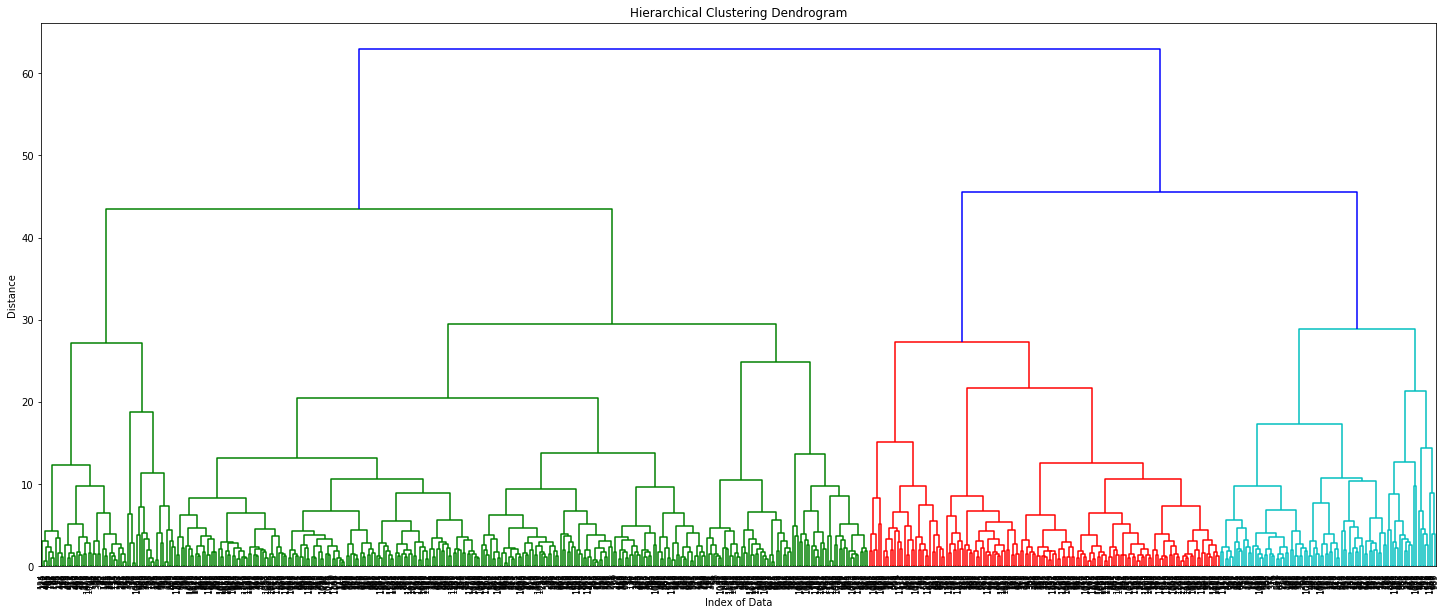

In [555]:
# Choose Methods
Z = linkage(selected_features_df, 'ward')
plot_dendrogram('Bath Soap Member Clustering', "Index", 'Distance'
                , Z)

##### k 선정
---
Dendrogram 상으로 보았을 때 4개의 k를 선정하는 것이 가장 타당한 것으로 보인다. 수립할 수 있는 마케팅 전략의 개수와 유사하다.

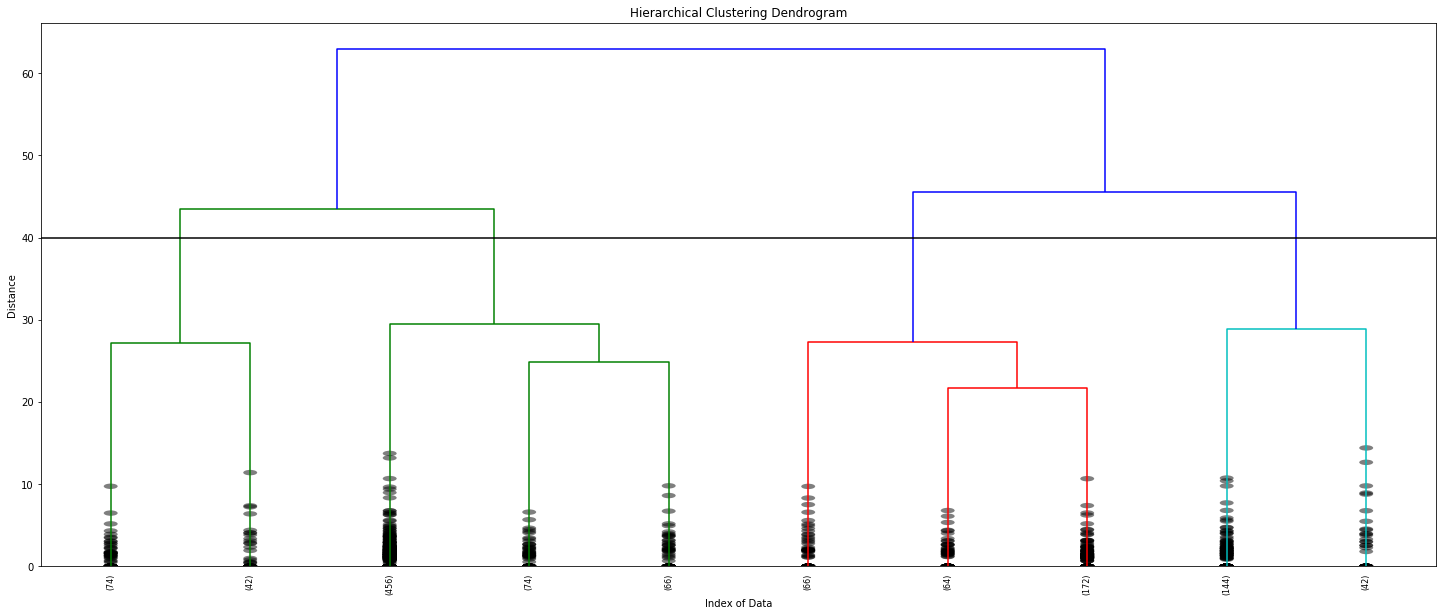

In [564]:
plot_dendrogram('Bath Soap Member Clustering', "Index", 'Distance'
                , Z, p=10, max_d=40)

In [565]:
predicted_labels_bath_soap = fcluster(Z, 40, criterion='distance')

In [566]:
scaled_df['predicted_labels'] = predicted_labels_bath_soap 

#### 5-3. 타겟 클러스터 선정 및 마케팅 기획
---
* 분석된 세분화에서 두 개의 클러스터를 선정하고, 그 집단의 특성에 대해 분석하시오.
* 선정한 두 클러스터에 대한 마케팅 전략을 수립하시오.

In [573]:
# Analysis
scaled_df.groupby('predicted_labels').mean().iloc[:, :40]

,SEC,AGE,EDU,HS,Affluence Index,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
predicted_labels,,,,,,,,,,,,,,,,,,,,,
1,3.189655,3.189655,2.775862,4.344828,-0.644224,-0.730761,-0.996437,0.273197,-0.362142,-0.382214,...,0.043923,0.098081,0.002018,0.021422,0.000846,0.004299,0.001376,0.002217,0.702295,0.003309
2,2.406040,3.127517,3.785235,3.479866,-0.132977,-0.418072,-0.405894,-0.520397,-0.541631,-0.473365,...,0.081274,0.100349,0.092856,0.023549,0.027082,0.032020,0.006832,0.022244,0.076908,0.027764
3,2.158940,3.271523,5.112583,4.403974,0.487155,0.930492,1.037780,-0.040492,0.905121,0.250164,...,0.124958,0.110284,0.113423,0.045748,0.021899,0.028061,0.008641,0.048124,0.045350,0.029468
4,2.924731,3.408602,3.924731,6.032258,0.036900,0.284573,0.237043,1.562874,0.491797,1.348993,...,0.104928,0.063440,0.034131,0.035649,0.007770,0.038622,0.003331,0.010090,0.122460,0.024984
